In [30]:
import pandas as pd
import numpy as np
import json
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_item = pd.read_json('../douban_movie/data/movie_item.json', lines = True)
print('电影数量：',data_item.shape[0] )

电影数量： 246


In [3]:
data_item['movie_id'] = data_item['movie_id'].apply(lambda x: int(x[0][3:]))  # [电影-1300267] -> int(1300267)
data_item['comment_num'] = data_item['comment_num'].apply(lambda x: int(x[2:-1]))  # 全部 62309 条 -> int(62309)
data_item['question_num'] = data_item['question_num'].apply(lambda x: int(x[2:-1]))  # 全部23个 -> int(23)
data_item['rating_num'] = data_item['rating_num'].apply(lambda x: float(x[0]))   # [9.2] -> float(9.2)
data_item['rating_per_stars1'] = data_item['rating_per_stars1'].apply(lambda x: float(x[:-1]))   # 0.1% -> float(0.1)
data_item['rating_per_stars2'] = data_item['rating_per_stars2'].apply(lambda x: float(x[:-1]))  
data_item['rating_per_stars3'] = data_item['rating_per_stars3'].apply(lambda x: float(x[:-1]))  
data_item['rating_per_stars4'] = data_item['rating_per_stars4'].apply(lambda x: float(x[:-1]))  
data_item['rating_per_stars5'] = data_item['rating_per_stars5'].apply(lambda x: float(x[:-1]))
data_item['release_date'] = data_item['release_date'].apply(lambda x: int(x[0][1:-1]))  # [(1939)] -> int(1939)
data_item['vote_num'] = data_item['vote_num'].apply(lambda x: int(x[0]))   # [272357] -> int(272357)
data_item['movie_title'] = data_item['movie_title'].apply(lambda x: (x[0]))

# [238分钟] -> 238
data_item.loc[15,'runtime'] = ['80分钟']
pattern = '\d+'
import re
data_item['runtime'] = data_item['runtime'].apply(lambda x: (x[0]))
data_item['runtime'] = data_item['runtime'].str.findall(pattern,flags=re.IGNORECASE).apply(lambda x: int(x[0]))

def Intro(introduces):
    Intro_ = ''
    for intro in introduces:
        intro = intro.strip()
        Intro_ += intro
    return Intro_
data_item['intro'] = data_item.intro.apply(Intro)

In [4]:
data_item.head(1)

,country,intro,vote_num,movie_title,starring,comment_num,rating_per_stars4,language,directedBy,movie_id,runtime,rating_per_stars3,release_date,rating_per_stars2,rating_per_stars5,rating_num,genre,rating_per_stars1,question_num
0,美国,美国南北战争前夕，南方农场塔拉庄园的千金斯嘉丽（费雯·丽 Vivien Leigh 饰）爱上...,272357,乱世佳人 Gone with the Wind,"[托马斯·米切尔, 芭芭拉·欧内尔, 费雯·丽, 伊夫林·凯耶斯, 安·卢瑟福德, 乔治·里...",62309,27.0,英语,"[维克多·弗莱明, 乔治·库克, 山姆·伍德]",1300267,238,5.5,1939,0.3,67.1,9.2,"[剧情, 爱情, 历史, 战争]",0.1,23


In [5]:
data_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            246 non-null    object 
 1   intro              246 non-null    object 
 2   vote_num           246 non-null    int64  
 3   movie_title        246 non-null    object 
 4   starring           246 non-null    object 
 5   comment_num        246 non-null    int64  
 6   rating_per_stars4  246 non-null    float64
 7   language           246 non-null    object 
 8   directedBy         246 non-null    object 
 9   movie_id           246 non-null    int64  
 10  runtime            246 non-null    int64  
 11  rating_per_stars3  246 non-null    float64
 12  release_date       246 non-null    int64  
 13  rating_per_stars2  246 non-null    float64
 14  rating_per_stars5  246 non-null    float64
 15  rating_num         246 non-null    float64
 16  genre              246 non

In [8]:
# 总评分最高的十个电影
data_item.sort_values('rating_num',ascending = False)[['movie_title','rating_num']].head(10)

,movie_title,rating_num
243,肖申克的救赎 The Shawshank Redemption,9.6
236,控方证人 Witness for the Prosecution,9.6
102,美丽人生 La vita è bella,9.5
98,霸王别姬,9.5
107,十二怒汉 12 Angry Men,9.4
103,阿甘正传 Forrest Gump,9.4
101,这个杀手不太冷 Léon,9.4
100,辛德勒的名单 Schindler's List,9.4
108,机器人总动员 WALL·E,9.3
120,海豚湾 The Cove,9.3


In [15]:
#确定内容
def column_expand(data, column, list_values):
    for cl in list_values:
        tt = data_item[column].apply(lambda x: str(x)).str.contains('\W'+cl+'\W')
        uu = data_item[column].apply(lambda x: str(x)).str.contains('^'+cl+'$')
        ee = data_item[column].apply(lambda x: str(x)).str.contains(cl+'\s')
        ff = data_item[column].apply(lambda x: str(x)).str.contains('\s'+cl)
        cl_ = tt | uu| ee | ff
        cl_ *= 1
        data['%s_%s' %(column ,cl)] = cl_
        
def get_values_list(data, column, sep=None):
    Language_values=[]
    def countLANG(Languages):
        for language in Languages:
            language = language.strip()
            if language in Language_values: 
                continue
            else:
                Language_values.append(language)
    if sep:
        pd.DataFrame(data[column].str.split(sep))[column].apply(countLANG);
    else:
        data[column].apply(countLANG);
    return Language_values

def Paiming(data, column, list_values):
    column_expand(data, column, list_values)
    df = pd.DataFrame( 
        {'数目':[data['%s_%s' %(column, p)].sum() for p in list_values]}
        , index=list_values).sort_values('数目', ascending=False)
    return df

In [16]:
class_movie = ['剧情','爱情','喜剧','科幻','动作','悬疑','犯罪','恐怖','青春'
               ,'励志','战争','文艺','黑色幽默','传记','情色','暴力','音乐','家庭']
country_movie = ['大陆','美国','香港','台湾','日本','韩国','英国','法国','德国','意大利','西班牙','印度','泰国','俄罗斯'
 ,'伊朗','加拿大','澳大利亚','爱尔兰','瑞典','巴西','丹麦']

In [17]:
Paiming(data_item,'genre', class_movie)

,数目
剧情,191
爱情,62
喜剧,49
犯罪,45
动作,32
悬疑,29
家庭,27
科幻,25
战争,17
传记,12


In [23]:
# 最受欢迎的电影导演排名
temp = Paiming(data_item, 'directedBy', get_values_list(data_item, 'directedBy'))
print('共有%s位导演入选TOP250电影榜:' %len(temp))
temp.head(10)

共有196位导演入选TOP250电影榜:


,数目
克里斯托弗·诺兰,7
宫崎骏,7
史蒂文·斯皮尔伯格,6
王家卫,5
李安,4
大卫·芬奇,3
刘镇伟,3
理查德·林克莱特,3
朱塞佩·托纳多雷,3
詹姆斯·卡梅隆,3


In [24]:
# 最受欢迎的演员排名
temp = Paiming(data_item, 'starring', get_values_list(data_item, 'starring'))
print('共有%s位演员入选TOP250电影榜:' %len(temp))
temp.head(11)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


共有2317位演员入选TOP250电影榜:


,数目
张国荣,8
汤姆·汉克斯,7
布拉德·皮特,7
张曼玉,7
梁朝伟,7
伊桑·霍克,6
琼·艾伦,6
马特·达蒙,6
雨果·维文,6
莱昂纳多·迪卡普里奥,6


In [25]:
# 最受欢迎的出品国家排名
temp = Paiming(data_item, 'country', country_movie)
print('共有%s个出品国家入选TOP250电影榜:' %len(temp))
temp.head(15)
temp

共有21个出品国家入选TOP250电影榜:


,数目
美国,141
英国,34
日本,29
法国,27
香港,26
德国,19
意大利,10
韩国,8
大陆,7
加拿大,7


In [26]:
# 最受欢迎的语言排名
temp = Paiming(data_item, 'language', get_values_list(data_item, 'language', sep='/'))
print('共有%s种语言入选TOP250电影榜:' %len(temp))
temp.head(15)

共有60种语言入选TOP250电影榜:


,数目
英语,170
法语,41
日语,37
汉语普通话,33
德语,25
粤语,24
意大利语,19
西班牙语,15
俄语,12
拉丁语,8


In [27]:
# 电影时长
data_item.sort_values('runtime', ascending = False)[['movie_title','runtime']].head(10)

,movie_title,runtime
0,乱世佳人 Gone with the Wind,238
221,牯岭街少年杀人事件 牯嶺街少年殺人事件,237
235,美国往事 Once Upon a Time in America,229
199,教父2 The Godfather: Part Ⅱ,202
110,指环王3：王者无敌 The Lord of the Rings: The Return of...,201
100,辛德勒的名单 Schindler's List,195
104,泰坦尼克号 Titanic,194
230,绿里奇迹 The Green Mile,189
11,与狼共舞 Dances with Wolves,181
210,指环王2：双塔奇兵 The Lord of the Rings: The Two Towers,179


In [28]:
# 电影投票数排名
data_item.sort_values('vote_num', ascending = False)[['movie_title','vote_num']].head(10)

,movie_title,vote_num
243,肖申克的救赎 The Shawshank Redemption,877684
101,这个杀手不太冷 Léon,838853
105,盗梦空间 Inception,766735
103,阿甘正传 Forrest Gump,714946
28,三傻大闹宝莱坞 3 Idiots,676928
106,千与千寻 千と千尋の神隠し,666166
104,泰坦尼克号 Titanic,657294
98,霸王别姬,631204
171,让子弹飞,612443
26,海上钢琴师 La leggenda del pianista sull'oceano,601595


In [29]:
# 电影评价数的排名
data_item.sort_values('comment_num', ascending=False)[['movie_title','comment_num']].head(10)

,movie_title,comment_num
243,肖申克的救赎 The Shawshank Redemption,206334
105,盗梦空间 Inception,201260
113,少年派的奇幻漂流 Life of Pi,197790
28,三傻大闹宝莱坞 3 Idiots,192686
101,这个杀手不太冷 Léon,192324
83,疯狂动物城 Zootopia,182765
109,怦然心动 Flipped,178532
111,星际穿越 Interstellar,176341
98,霸王别姬,167573
171,让子弹飞,155386


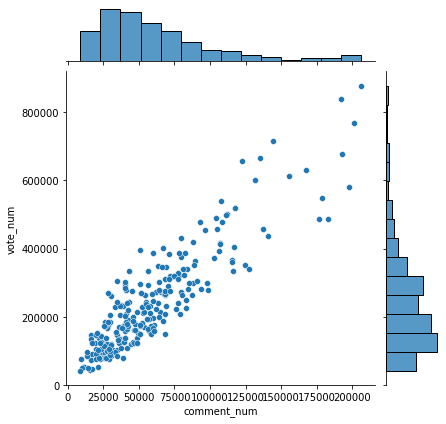

In [32]:
sns.jointplot(x="comment_num", y="vote_num",data=data_item)

In [33]:
# 电影问题数的排名
data_item.sort_values('question_num', ascending=False)[['movie_title','question_num']].head(10)

,movie_title,question_num
111,星际穿越 Interstellar,1215
196,消失的爱人 Gone Girl,282
83,疯狂动物城 Zootopia,264
19,彗星来的那一夜 Coherence,200
161,心迷宫,184
163,超能陆战队 Big Hero 6,142
172,布达佩斯大饭店 The Grand Budapest Hotel,135
224,爆裂鼓手 Whiplash,133
223,恐怖游轮 Triangle,119
231,再次出发之纽约遇见你 Begin Again,116


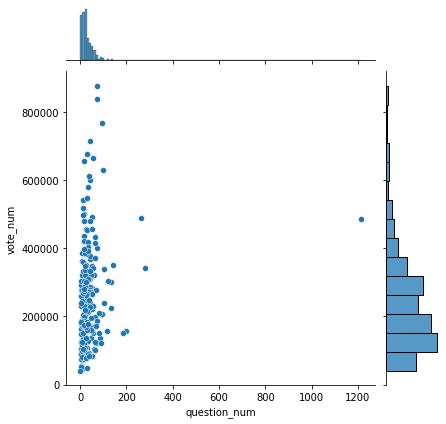

In [34]:
sns.jointplot(x="question_num", y="vote_num", data=data_item)